In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

data = pd.read_csv('stud_math.xls', sep=',',encoding='koi8-r')

## Общая оценка датасета

In [4]:
display(data.head(10)) # Рассмотрим какие данные хранятся в файле и какие типы данных у столбцов
data.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
data.columns # Выводим название столбцов

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
data = data.dropna(subset = ['score']) # Удаляем пропуски из столбца «score»

In [7]:
for col in data.select_dtypes(include=np.number):   # В категориальных столбцах меняем пропуски на медиану по столбцу
    data[col] = data[col].fillna(data[col].median())

In [8]:
data.drop(['studytime, granular'], axis='columns', inplace=True) # Удаляем столбец «studytime, granular»

## Оценка и очистка данных в числовых столбцах

In [9]:
pd.unique(data['age']).tolist()

[18, 17, 15, 16, 19, 22, 20, 21]

In [10]:
pd.unique(data['Medu']).tolist()

[4.0, 1.0, 3.0, 2.0, 0.0]

In [11]:
pd.unique(data['Fedu']).tolist() # 40 — ошибка в данных

[4.0, 1.0, 2.0, 3.0, 40.0, 0.0]

In [12]:
data = data.query("Fedu != 40.0") # Удаляем ошибку  в столбце «Fedu»

In [13]:
pd.unique(data['traveltime']).tolist()

[2.0, 1.0, 3.0, 4.0]

In [14]:
pd.unique(data['studytime']).tolist()

[2.0, 3.0, 1.0, 4.0]

In [15]:
pd.unique(data['failures']).tolist()

[0.0, 3.0, 2.0, 1.0]

In [16]:
pd.unique(data['famrel']).tolist() # минус 1 — ошибка в данных

[4.0, 5.0, 3.0, -1.0, 2.0, 1.0]

In [17]:
data = data.query('famrel != -1.0') # Удаляем ошибку  в столбце «famrel»

In [18]:
pd.unique(data['freetime']).tolist()

[3.0, 2.0, 4.0, 1.0, 5.0]

In [19]:
pd.unique(data['goout']).tolist()

[4.0, 3.0, 2.0, 1.0, 5.0]

In [20]:
pd.unique(data['health']).tolist()

[3.0, 5.0, 1.0, 2.0, 4.0]

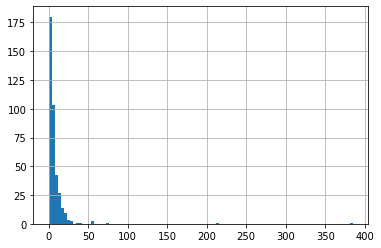

In [21]:
data['absences'].hist(bins=100) # В столбце присутсивуют выбросы

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


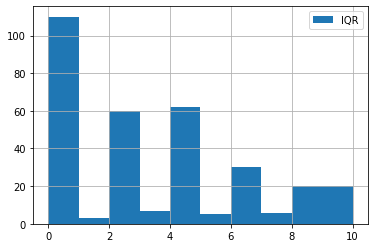

In [22]:
# Отфильтруем выбросы в колонке «absences» с помощью формулы межквартильного расстояния

median = data.absences.median()
IQR = data.absences.quantile(0.75) - data.absences.quantile(0.25)
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
data.absences.loc[data.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [23]:
# Отфильтруем данные в колонке «absences»

data = data.loc[data.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [24]:
data['absences'].describe()

count    370.000000
mean       4.567568
std        4.904732
min        0.000000
25%        0.000000
50%        4.000000
75%        6.750000
max       20.000000
Name: absences, dtype: float64

In [25]:
pd.unique(data['score']).tolist() # Ноль по экзамену это не похоже на правду

[30.0,
 50.0,
 75.0,
 55.0,
 95.0,
 45.0,
 70.0,
 80.0,
 25.0,
 60.0,
 40.0,
 85.0,
 90.0,
 65.0,
 100.0,
 35.0,
 0.0]

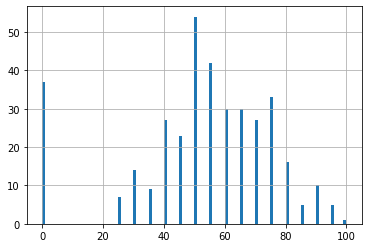

In [26]:
data['score'].hist(bins=100) # Диаграмма подтверждает предположение

In [27]:
data = data.query('score != 0.0') # Удалим ошибки из датасета «score»

## Работа с неинформативными признаками

In [28]:
# Мы не будем чистить данные в категоримальных признаках, поэтому отфильтруем неинформативные признаки
# В категорию неинформативных признаков войдут все признаки, где 75% сторок содержат одно и тоже значение

num_rows = len(data.index)
low_information_cols = [] #
for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.75:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

school: 87.98799%
GP    293
MS     40
Name: school, dtype: int64

Pstatus: 80.78078%
T      269
NaN     34
A       30
Name: Pstatus, dtype: int64

failures: 84.68468%
0.0    282
1.0     33
3.0     10
2.0      8
Name: failures, dtype: int64

schoolsup: 83.78378%
no     279
yes     45
NaN      9
Name: schoolsup, dtype: int64

nursery: 77.17718%
yes    257
no      64
NaN     12
Name: nursery, dtype: int64

higher: 90.99099%
yes    303
NaN     18
no      12
Name: higher, dtype: int64

internet: 77.17718%
yes    257
no      48
NaN     28
Name: internet, dtype: int64



In [29]:
# Удалим неинформативные признаки

data.drop(['school', 'Pstatus', 'failures', 'schoolsup', 'nursery', 'higher', 'internet'], axis='columns', inplace=True)

## Корреляционный анализ

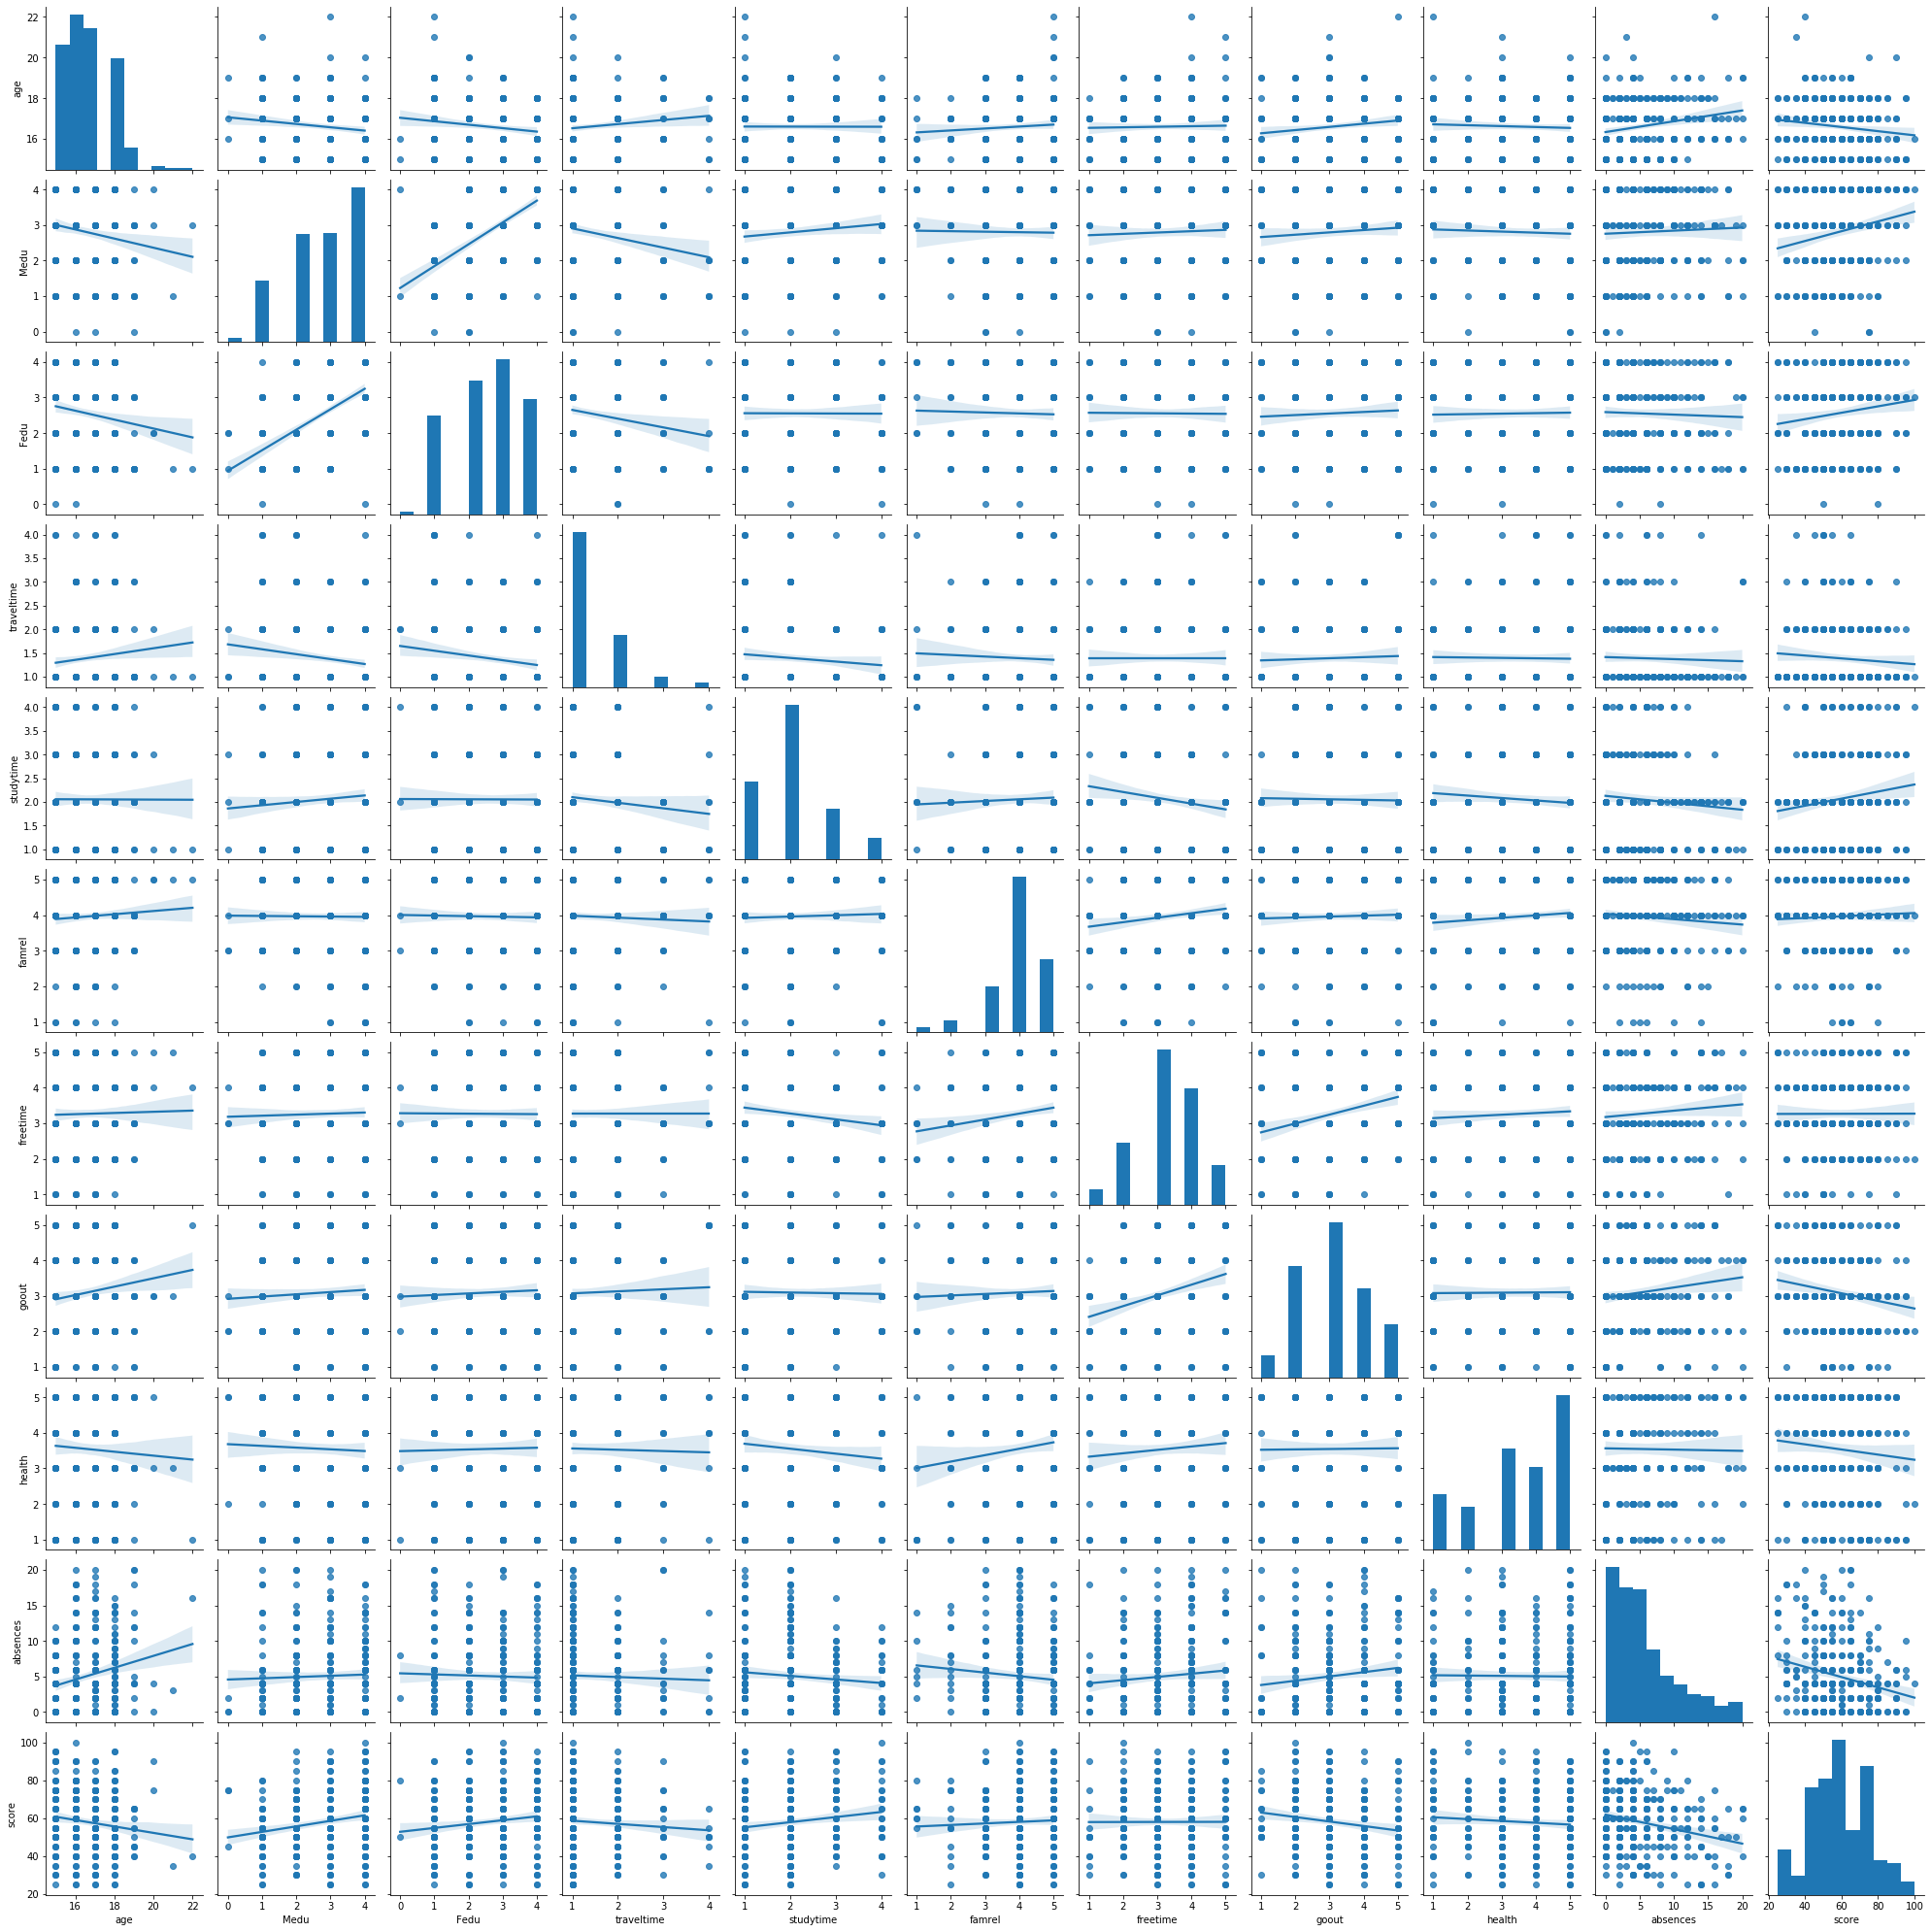

In [30]:
# Выясняем, какие признаки коррелируют с итоговой оценкой по метематике

sns.pairplot(data, kind = 'reg')

In [31]:
# Для наглядности используем матрицу с корреляцией
# Поскольку довепрительный интервал применять не учили, в качестве значимой возьмем корреляцию больше 0,1

data.corr()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,score
age,1.000000,-0.145052,-0.146092,0.111751,-0.002338,0.065996,0.021210,0.136172,-0.049595,0.210625,-0.131772
Medu,-0.145052,1.000000,0.594914,-0.167757,0.089916,-0.010963,0.033363,0.064263,-0.038337,0.039076,0.200044
Fedu,-0.146092,0.594914,1.000000,-0.157220,-0.003363,-0.021008,-0.007076,0.044135,0.018164,-0.032575,0.135411
traveltime,0.111751,-0.167757,-0.157220,1.000000,-0.095205,-0.043000,-0.000054,0.036265,-0.017910,-0.031737,-0.071758
studytime,-0.002338,0.089916,-0.003363,-0.095205,1.000000,0.036297,-0.142141,-0.015562,-0.084900,-0.085920,0.142033
famrel,0.065996,-0.010963,-0.021008,-0.043000,0.036297,1.000000,0.145248,0.033213,0.111082,-0.087696,0.043361
freetime,0.021210,0.033363,-0.007076,-0.000054,-0.142141,0.145248,1.000000,0.274203,0.067558,0.089765,0.001679
goout,0.136172,0.064263,0.044135,0.036265,-0.015562,0.033213,0.274203,1.000000,0.008205,0.131444,-0.159093
health,-0.049595,-0.038337,0.018164,-0.017910,-0.084900,0.111082,0.067558,0.008205,1.000000,-0.012585,-0.083535
absences,0.210625,0.039076,-0.032575,-0.031737,-0.085920,-0.087696,0.089765,0.131444,-0.012585,1.000000,-0.235433


In [32]:
# Удалим из датасета слабо скоррелированные с итоговой оценкой признаки

data.drop(['traveltime', 'famrel', 'freetime', 'health'], axis='columns', inplace=True)

## Анализ номинативных переменных

In [33]:
# Для номинативных переменных использовать корреляционный анализ не получится
# Оценим статистическую разницу в распределении оценок по номинативным признакам, с помощью теста Стьюдента

def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [34]:
for col in ['sex', 'address', 'famsize', 'Mjob', 'Fjob', 'reason', 'guardian', 'famsup', 'paid', 'activities', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob


In [35]:
# Так как серьёзно отличаются параметры: sex, address и  Mjob, оставим их датасете, остальное удалим

data.drop(['famsize', 'Fjob', 'reason', 'guardian', 'famsup', 'paid', 'activities', 'romantic']
          ,axis='columns', inplace=True)

## Формирование итогового датасета для построения модели

In [235]:
display(data.head(10)) # Рассмотрим какие данные хранятся в файле и какие типы данных у столбцов
data.info()

,sex,age,address,Medu,Fedu,Mjob,studytime,goout,absences,score
0,F,18,U,4.0,4.0,at_home,2.0,4.0,6.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,3.0,4.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,2.0,10.0,50.0
3,F,15,U,4.0,2.0,health,3.0,2.0,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,2.0,4.0,50.0
5,M,16,U,4.0,3.0,services,2.0,2.0,10.0,75.0
6,M,16,NaN,2.0,2.0,other,2.0,4.0,0.0,55.0
7,F,17,U,4.0,4.0,other,2.0,4.0,6.0,30.0
8,M,15,U,3.0,2.0,services,2.0,2.0,0.0,95.0
9,M,15,U,3.0,4.0,other,2.0,1.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 394
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        333 non-null    object 
 1   age        333 non-null    int64  
 2   address    319 non-null    object 
 3   Medu       333 non-null    float64
 4   Fedu       333 non-null    float64
 5   Mjob       318 non-null    object 
 6   studytime  333 non-null    float64
 7   goout      333 non-null    float64
 8   absences   333 non-null    float64
 9   score      333 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 38.6+ KB


### Выводы:
На результаты госэкзамена по математике оказывает влияние:
    пол;
    возраст — чем старше ребенок, тем хуже результат;
    место жительства;
    образование родителей — чем выше, тем лучше результат;
    Mjob;
    время на учёбу помимо школы — чем больше, тем лучше результат;
    проведение времени с друзьями — чем больше, тем хуже результат;
    количество пропущенных занятий — чем больше, тем хуже результат.